In [1]:
%matplotlib inline
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import datetime
import math
import pandas as pd
import subprocess
from geopy.distance import vincenty
from geopy.geocoders import Nominatim
geolocator = Nominatim()
#
df_entire=pd.read_json('train2.json') # load entire data set
# extract month of listing creation
df_entire['created']=pd.to_datetime(df_entire['created'])
df_entire['month']=df_entire['created'].dt.month
df_entire['date']=df_entire['created'].dt.day
df_entire['price_scaled_bath']=df_entire['price']/df_entire['bathrooms']
df_shuffled=df_entire.sample(frac=1)
df_train=df_shuffled[:int(0.6*len(df_shuffled))]
df_test=df_shuffled[int(0.6*len(df_shuffled)):int(len(df_shuffled))]
print(df_train.shape)
print(df_test.shape)
df_entire['date'].value_counts()
print(df_entire.shape)
percent_low=100*df_train['interest_level'].value_counts()['low']/df_train['interest_level'].value_counts().sum()
percent_medium=100*df_train['interest_level'].value_counts()['medium']/df_train['interest_level'].value_counts().sum()
percent_high=100*df_train['interest_level'].value_counts()['high']/df_train['interest_level'].value_counts().sum()
print('low-->',percent_low,'%')
print('medium-->',percent_medium,'%')
print('high-->',percent_high,'%')
df_entire.dtypes

(29611, 18)
(19741, 18)
(49352, 18)
low--> 69.6497923069 %
medium--> 22.6469892945 %
high--> 7.70321839857 %


bathrooms                   float64
bedrooms                      int64
building_id                  object
created              datetime64[ns]
description                  object
display_address              object
features                     object
interest_level               object
latitude                    float64
listing_id                    int64
longitude                   float64
manager_id                   object
photos                       object
price                         int64
street_address               object
month                         int64
date                          int64
price_scaled_bath           float64
dtype: object

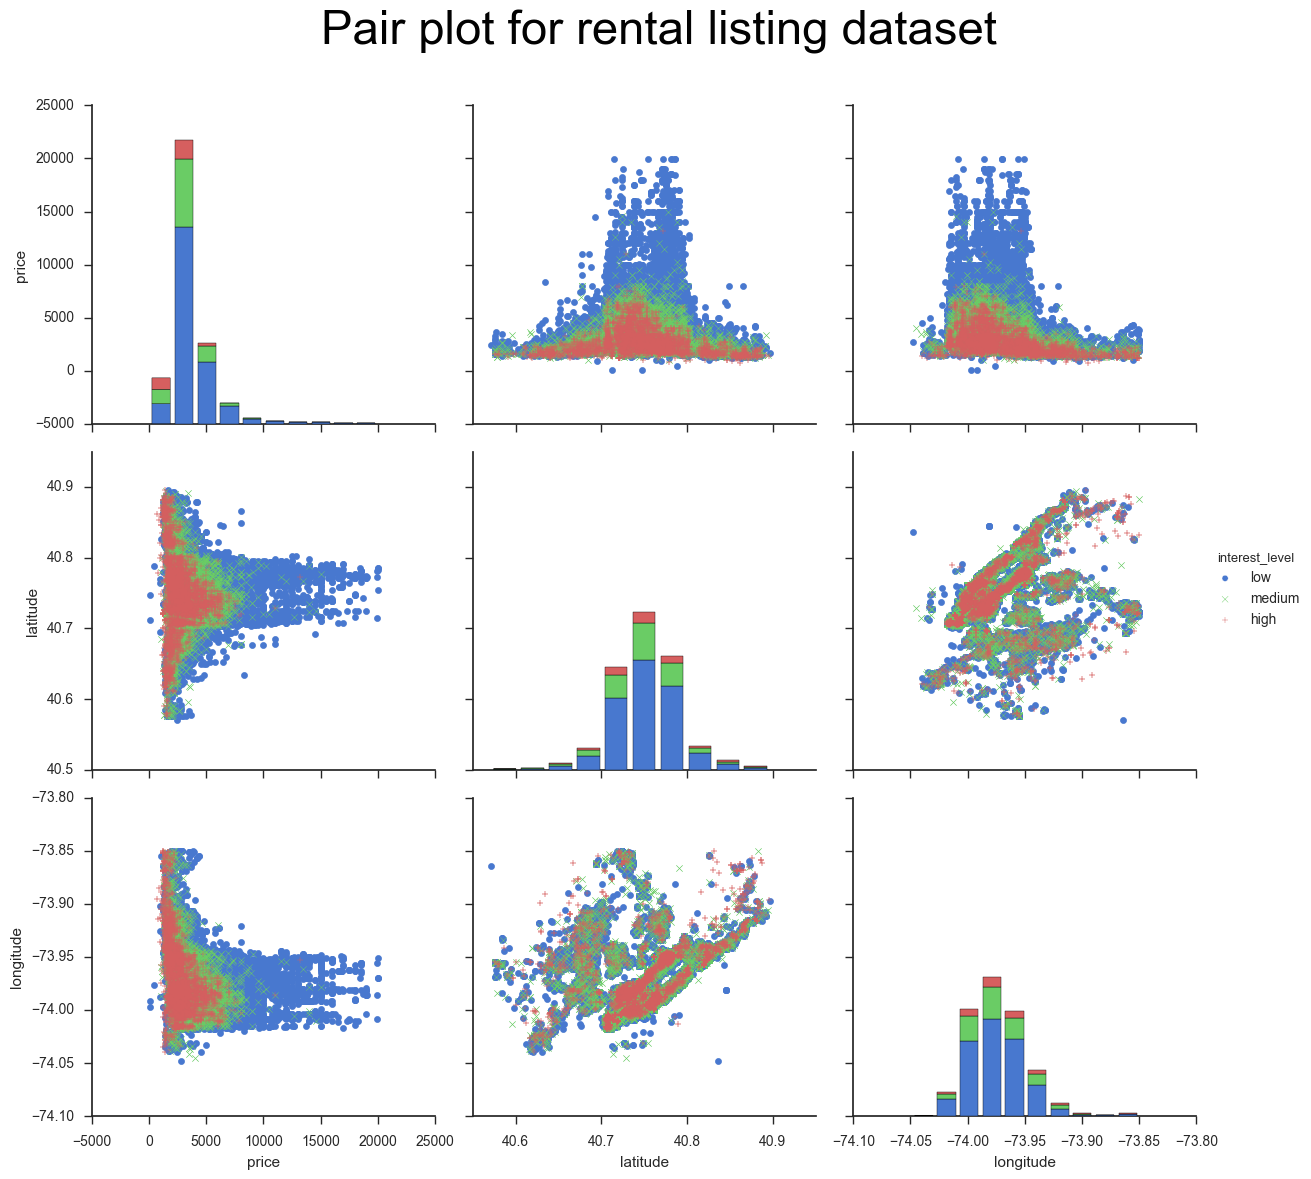

In [68]:
## explore pair plot
import seaborn as sns
sns.set_style("whitegrid")
sns.set(style="ticks")
df_entire_ss=df_entire[(df_entire['price']>0)&(df_entire['price']<20000)&(df_entire['latitude']<40.9)&(df_entire['latitude']>40.55)&(df_entire['longitude']<-73.85)&(df_entire['longitude']>-74.05)]
g=sns.pairplot(df_entire_ss,palette="muted",markers=['o','x','+'],vars=['price','latitude','longitude'],size=4,hue='interest_level',hue_order=['low','medium','high'])
g = g.map_offdiag(plt.scatter,  s=20)
# remove the top and right line in graph
sns.despine()
# Additional line to adjust some appearance issue
plt.subplots_adjust(top=0.9)

# Set the Title of the graph from here
g.fig.suptitle('Pair plot for rental listing dataset',
    fontsize=34,color="k",alpha=1)
g.savefig('pairplot_price_latitude_longitude.png')

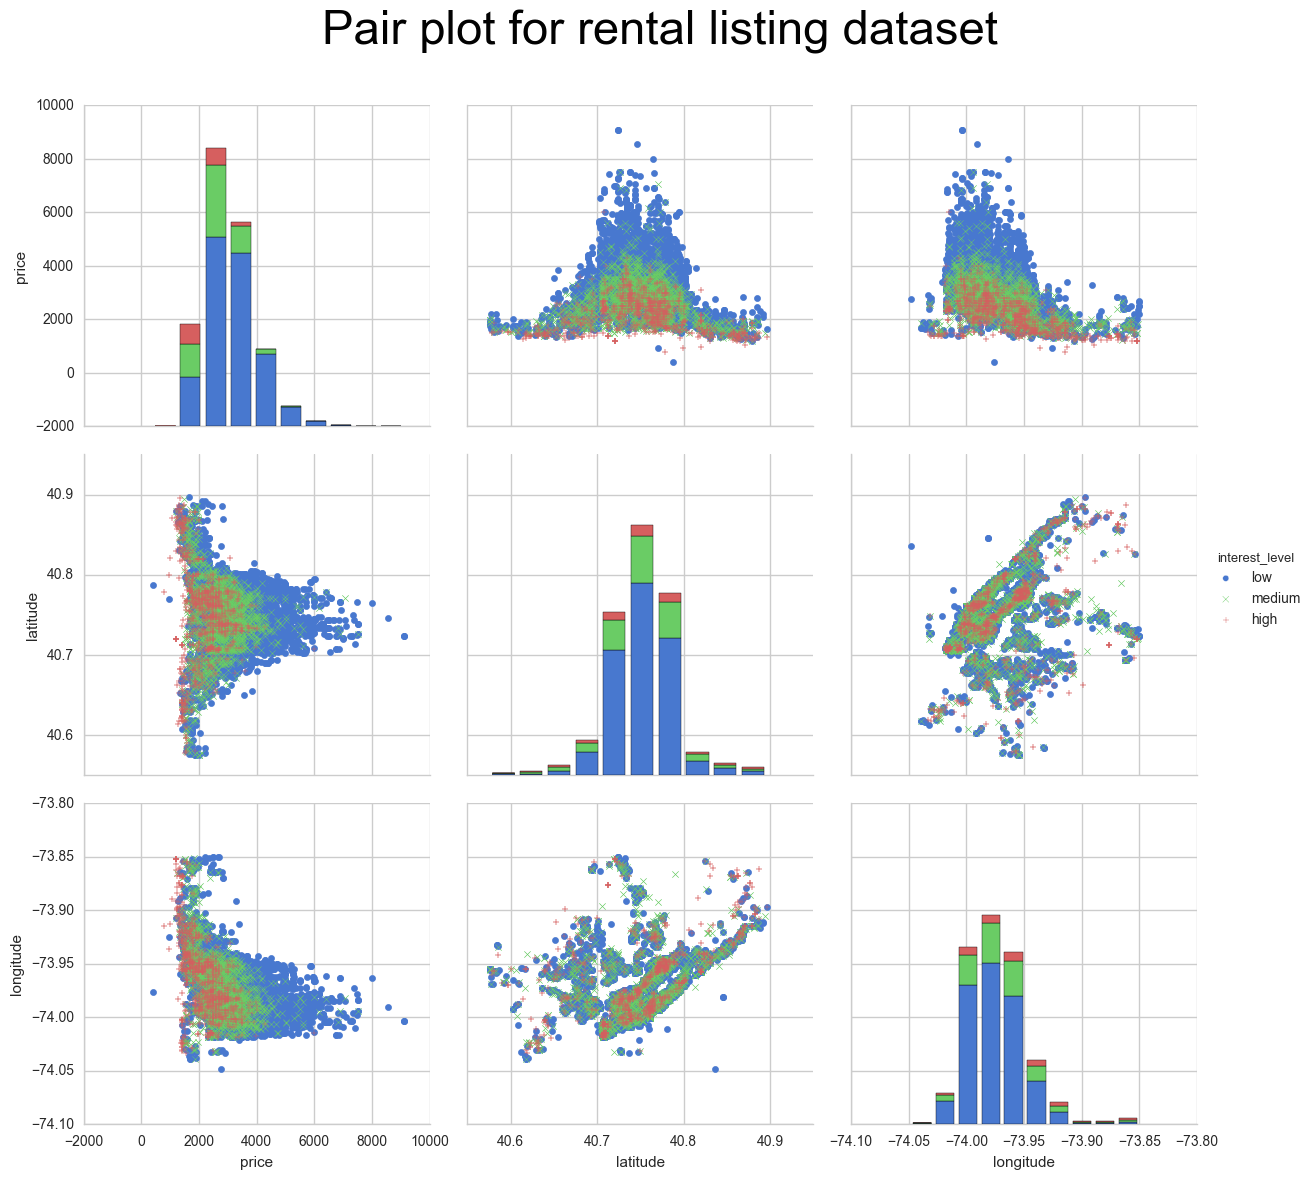

In [109]:
## explore pair plot
import seaborn as sns
sns.set_style("whitegrid")
#sns.set(style="ticks")
df_entire_ss_1bath=df_entire[(df_entire['bathrooms']==1)&(df_entire['bedrooms']==1)&(df_entire['price']>0)&(df_entire['price']<10000)&(df_entire['latitude']<40.9)&(df_entire['latitude']>40.55)&(df_entire['longitude']<-73.85)&(df_entire['longitude']>-74.05)]
g=sns.pairplot(df_entire_ss_1bath,palette="muted",markers=['o','x','+'],vars=['price','latitude','longitude'],size=4,hue='interest_level',hue_order=['low','medium','high'])
g = g.map_offdiag(plt.scatter,  s=20)
# remove the top and right line in graph
sns.despine()
# Additional line to adjust some appearance issue
plt.subplots_adjust(top=0.9)

# Set the Title of the graph from here
g.fig.suptitle('Pair plot for rental listing dataset',
    fontsize=34,color="k",alpha=1)
g.savefig('pairplot_price_latitude_longitude_for_0bed_1bath.png')

2215

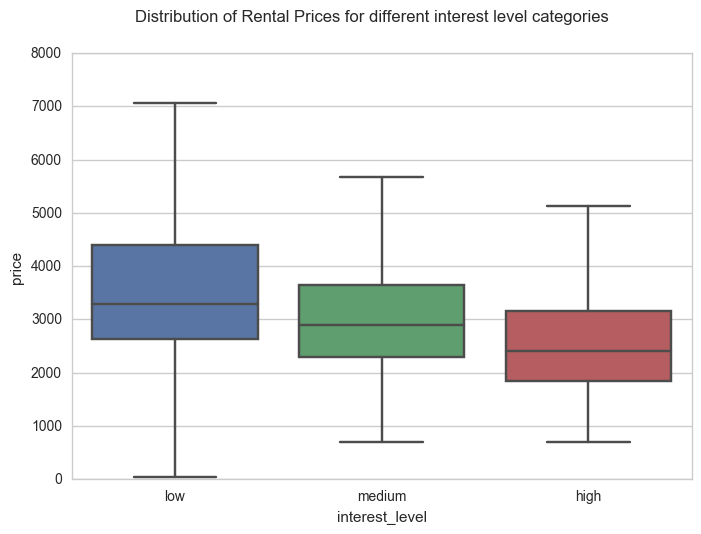

In [4]:
## explore price and interest level
import seaborn as sns
sns.set_style("whitegrid")
#tips = sns.load_dataset("df_entire")
df_entire2=df_entire[df_entire['bathrooms']>0]
ax = sns.boxplot(y=df_entire["price"],x=df_entire['interest_level'],order=['low','medium','high'],showfliers=False)
fig = ax.get_figure()
fig.suptitle('Distribution of Rental Prices for different interest level categories')
fig.savefig("price_boxplot.png")
#fig.ylabel('Rental Price ($)')
df_entire[df_entire['price']>7000]['interest_level'].value_counts().sum()

In [9]:
bedbathmat=pd.crosstab(df_train.bedrooms, df_train.bathrooms, margins=True)
bedbathmat_low=pd.crosstab(df_train[df_train['interest_level']=='low'].bedrooms, df_train[df_train['interest_level']=='low'].bathrooms, margins=True)
bedbathmat_medium=pd.crosstab(df_train[df_train['interest_level']=='medium'].bedrooms, df_train[df_train['interest_level']=='medium'].bathrooms, margins=True)
bedbathmat_high=pd.crosstab(df_train[df_train['interest_level']=='high'].bedrooms, df_train[df_train['interest_level']=='high'].bathrooms, margins=True)

In [10]:
pd.crosstab(df_entire.bathrooms, df_entire.interest_level, margins=True)

interest_level,high,low,medium,All
bathrooms,,,,
0.0,1,306,6,313
1.0,3413,26581,9428,39422
1.5,0,605,40,645
2.0,407,5566,1687,7660
2.5,0,274,3,277
3.0,14,671,60,745
3.5,0,70,0,70
4.0,4,150,5,159
4.5,0,29,0,29


In [11]:
bedbathmat_low

bathrooms,0.0,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,All
bedrooms,,,,,,,,,,,,,,,
0,99,3792,5,17,0,0,0,0,0,0,0,0,0,0,3913
1,44,6815,103,105,1,7,0,0,1,0,0,0,0,0,7076
2,38,4008,116,1651,57,18,1,0,0,0,0,0,0,0,5889
3,13,1237,119,1090,83,276,15,13,0,0,0,0,0,0,2846
4,1,135,33,382,24,72,21,54,9,8,3,0,0,0,742
5,0,5,4,69,2,22,0,23,6,2,1,2,0,1,137
6,0,1,1,7,0,12,0,6,0,0,0,1,0,0,28
7,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [12]:
bedbathmat_medium

bathrooms,0.0,1.0,1.5,2.0,2.5,3.0,4.0,All
bedrooms,,,,,,,,
0,3,1273,0,3,0,0,0,1279
1,1,1829,0,13,0,1,0,1844
2,0,1752,5,291,0,0,0,2048
3,0,673,14,454,1,19,0,1161
4,1,49,4,254,1,15,3,327
5,0,0,0,2,0,0,0,2
6,0,0,0,0,0,1,0,1
7,0,0,0,0,0,1,0,1
All,5,5576,23,1017,2,37,3,6663


In [13]:
bedbathmat_high

bathrooms,0.0,1.0,2.0,3.0,4.0,All
bedrooms,,,,,,
0,1,508,0,0,0,509
1,0,576,2,2,0,580
2,0,726,62,0,0,788
3,0,222,113,3,2,340
4,0,19,74,4,1,98
All,1,2051,251,9,3,2315


In [14]:
baths=pd.crosstab(df_entire.bathrooms, df_entire.interest_level, margins=True)
baths['low interest (%)']=100*baths['low']/baths['All']
baths['medium interest (%)']=100*baths['medium']/baths['All']
baths['high interest (%)']=100*baths['high']/baths['All']
baths
#baths.drop(['high','low','medium','All'],axis=1)

interest_level,high,low,medium,All,low interest (%),medium interest (%),high interest (%)
bathrooms,,,,,,,
0.0,1,306,6,313,97.763578,1.916933,0.319489
1.0,3413,26581,9428,39422,67.426818,23.915580,8.657602
1.5,0,605,40,645,93.798450,6.201550,0.000000
2.0,407,5566,1687,7660,72.663185,22.023499,5.313316
2.5,0,274,3,277,98.916968,1.083032,0.000000
3.0,14,671,60,745,90.067114,8.053691,1.879195
3.5,0,70,0,70,100.000000,0.000000,0.000000
4.0,4,150,5,159,94.339623,3.144654,2.515723
4.5,0,29,0,29,100.000000,0.000000,0.000000


In [180]:
df_entire_1bath=df_entire[df_entire['bathrooms']==1]
beds1bth=pd.crosstab(df_entire_1bath.bedrooms, df_entire.interest_level, margins=True)
beds1bth['low interest (%)']=100*beds1bth['low']/beds1bth['All']
beds1bth['medium interest (%)']=100*beds1bth['medium']/beds1bth['All']
beds1bth['high interest (%)']=100*beds1bth['high']/beds1bth['All']
#print(beds1bth)
beds1bth
#beds1bth.plot(y=['low interest (%)','medium interest (%)','high interest (%)'],kind='line',xlim=(0,4))

interest_level,high,low,medium,All,low interest (%),medium interest (%),high interest (%)
bedrooms,,,,,,,
0.0,845,6332,2102,9279,68.240112,22.653303,9.106585
1.0,935,11302,3064,15301,73.864453,20.024835,6.110712
2.0,1214,6637,3021,10872,61.046726,27.786976,11.166299
3.0,388,2070,1136,3594,57.595993,31.608236,10.795771
4.0,31,229,105,365,62.739726,28.767123,8.493151
5.0,0,10,0,10,100.000000,0.000000,0.000000
6.0,0,1,0,1,100.000000,0.000000,0.000000
All,3413,26581,9428,39422,67.426818,23.915580,8.657602


In [102]:
df_entire_2bath=df_entire[df_entire['bathrooms']==2]
beds2bth=pd.crosstab(df_entire_2bath.bedrooms, df_entire.interest_level, margins=True)
beds2bth['low interest (%)']=100*beds2bth['low']/beds2bth['All']
beds2bth['medium interest (%)']=100*beds2bth['medium']/beds2bth['All']
beds2bth['high interest (%)']=100*beds2bth['high']/beds2bth['All']
beds2bth
#print(beds2bth)
#beds2bth.plot(y=['low interest (%)','medium interest (%)','high interest (%)'],kind='line',xlim=(0,4))

interest_level,high,low,medium,All,low interest (%),medium interest (%),high interest (%)
bedrooms,,,,,,,
0.0,1,24,4,29,82.758621,13.793103,3.448276
1.0,6,174,27,207,84.057971,13.043478,2.898551
2.0,92,2779,488,3359,82.732956,14.528133,2.738910
3.0,197,1809,763,2769,65.330444,27.555074,7.114482
4.0,109,643,403,1155,55.670996,34.891775,9.437229
5.0,2,126,2,130,96.923077,1.538462,1.538462
6.0,0,11,0,11,100.000000,0.000000,0.000000
All,407,5566,1687,7660,72.663185,22.023499,5.313316


In [164]:
def interest_predict_bb(train,numbed,numbath,price,level,iprice):
    #print(numbed,numbath)
    count_total=len(train[(train['bathrooms']==numbath)&(train['bedrooms']==numbed)])
    count_low=len(train[(train['bathrooms']==numbath)&(train['bedrooms']==numbed)&(train['interest_level']=='low')])
    count_medium=len(train[(train['bathrooms']==numbath)&(train['bedrooms']==numbed)&(train['interest_level']=='medium')])
    count_high=len(train[(train['bathrooms']==numbath)&(train['bedrooms']==numbed)&(train['interest_level']=='high')])
    if count_total==0:
        return 0.33
    if count_low>=5: 
        price_low_50=train[(train['bathrooms']==numbath)&(train['bedrooms']==numbed)&(train['interest_level']=='low')]['price'].quantile(0.5)
        price_low_25=train[(train['bathrooms']==numbath)&(train['bedrooms']==numbed)&(train['interest_level']=='low')]['price'].quantile(0.25)
        price_low_75=train[(train['bathrooms']==numbath)&(train['bedrooms']==numbed)&(train['interest_level']=='low')]['price'].quantile(0.75)
        if price==price_low_50:
            lowp=1
        elif price>price_low_50:
            lowp=(count_low/count_total)*(price_low_75-price_low_50)/(price-price_low_50)
        else:
            lowp=(count_low/count_total)*(price_low_50-price_low_25)/(-price+price_low_50) 
    else:
        lowp=count_low/count_total
    if count_medium>=5: 
        price_medium_50=train[(train['bathrooms']==numbath)&(train['bedrooms']==numbed)&(train['interest_level']=='medium')]['price'].quantile(0.5)
        price_medium_25=train[(train['bathrooms']==numbath)&(train['bedrooms']==numbed)&(train['interest_level']=='medium')]['price'].quantile(0.25)
        price_medium_75=train[(train['bathrooms']==numbath)&(train['bedrooms']==numbed)&(train['interest_level']=='medium')]['price'].quantile(0.75)
        if price==price_medium_50:
            mediump=1
        elif price>price_medium_50:
            mediump=(count_medium/count_total)*(price_medium_75-price_medium_50)/(price-price_medium_50)
        else:
            mediump=(count_medium/count_total)*(price_medium_50-price_medium_25)/(-price+price_medium_50) 
    else:
        mediump=count_medium/count_total
    if count_high>=5: 
        price_high_50=train[(train['bathrooms']==numbath)&(train['bedrooms']==numbed)&(train['interest_level']=='high')]['price'].quantile(0.5)
        price_high_25=train[(train['bathrooms']==numbath)&(train['bedrooms']==numbed)&(train['interest_level']=='high')]['price'].quantile(0.25)
        price_high_75=train[(train['bathrooms']==numbath)&(train['bedrooms']==numbed)&(train['interest_level']=='high')]['price'].quantile(0.75)
        if price==price_high_50:
            highp=1
        elif price>price_medium_50:
            highp=(count_high/count_total)*(price_high_75-price_high_50)/(price-price_high_50)
        else:
            highp=(count_high/count_total)*(price_high_50-price_high_25)/(-price+price_high_50) 
    else:
        highp=count_high/count_total  
    if iprice==1:
        #return [lowp/(lowp+mediump+highp),mediump/(lowp+mediump+highp),highp/(lowp+mediump+highp)]
        if level=='low':
            return lowp/(lowp+mediump+highp)
        if level=='medium':
            return mediump/(lowp+mediump+highp)
        if level=='high':
            return highp/(lowp+mediump+highp)
    else:
        #return [count_low/count_total,count_medium/count_total,count_high/count_total]
        if level=='low':
            return count_low/count_total
        if level=='medium':
            return count_medium/count_total
        if level=='high':
            return count_high/count_total        

In [165]:
def interest_predict_bbpll_lp(train,nbed,nbath,price,lat,long):
    # predicts interest level by
    # if nbath!=1 & nbath!=2
    if (nbath!=1) & (nbath!=2):
        lowp=len(train[(train['bathrooms']!=1)&(train['bathrooms']!=2)&(train['interest_level']=='low')])/train[(train['bathrooms']!=1)&(train['bathrooms']!=2)]['interest_level'].value_counts().sum()
        mediump=len(train[(train['bathrooms']!=1)&(train['bathrooms']!=2)&(train['interest_level']=='medium')])/train[(train['bathrooms']!=1)&(train['bathrooms']!=2)]['interest_level'].value_counts().sum()
        highp=len(train[(train['bathrooms']!=1)&(train['bathrooms']!=2)&(train['interest_level']=='high')])/train[(train['bathrooms']!=1)&(train['bathrooms']!=2)]['interest_level'].value_counts().sum()
        return lowp
    else:
        nlist=train[(train['bedrooms']==nbed)&(train['bathrooms']==nbath)]['interest_level'].value_counts().sum()
        if nlist==0:
            return 1.0
        else:
            latl=lat-0.1
            lath=lat+0.1
            longl=long-0.05
            longh=long+0.05
            pricel=price-1000
            priceh=price+1000
            train_slice=train[(train['price']>=pricel)&(train['price']<=priceh)&(train['latitude']>=latl)&(train['latitude']<=lath)&(train['longitude']>=longl)&(train['longitude']<=longh)]
            nlist=train_slice['interest_level'].value_counts().sum()
            if nlist==0:
                return 1.0
            else:
                lowp=len(train_slice[train_slice['interest_level']=='low'])/nlist
                mediump=len(train_slice[train_slice['interest_level']=='medium'])/nlist
                highp=len(train_slice[train_slice['interest_level']=='high'])/nlist
                return lowp

In [166]:
def interest_predict_bbpll_mp(train,nbed,nbath,price,lat,long):
    # predicts interest level by
    # if nbath!=1 & nbath!=2
    if (nbath!=1) & (nbath!=2):
        lowp=len(train[(train['bathrooms']!=1)&(train['bathrooms']!=2)&(train['interest_level']=='low')])/train[(train['bathrooms']!=1)&(train['bathrooms']!=2)]['interest_level'].value_counts().sum()
        mediump=len(train[(train['bathrooms']!=1)&(train['bathrooms']!=2)&(train['interest_level']=='medium')])/train[(train['bathrooms']!=1)&(train['bathrooms']!=2)]['interest_level'].value_counts().sum()
        highp=len(train[(train['bathrooms']!=1)&(train['bathrooms']!=2)&(train['interest_level']=='high')])/train[(train['bathrooms']!=1)&(train['bathrooms']!=2)]['interest_level'].value_counts().sum()
        return mediump
    else:
        nlist=train[(train['bedrooms']==nbed)&(train['bathrooms']==nbath)]['interest_level'].value_counts().sum()
        if nlist==0:
            return 0.0
        else:
            latl=lat-0.1
            lath=lat+0.1
            longl=long-0.05
            longh=long+0.05
            pricel=price-1000
            priceh=price+1000
            train_slice=train[(train['price']>=pricel)&(train['price']<=priceh)&(train['latitude']>=latl)&(train['latitude']<=lath)&(train['longitude']>=longl)&(train['longitude']<=longh)]
            nlist=train_slice['interest_level'].value_counts().sum()
            if nlist==0:
                return 0.0
            else:
                lowp=len(train_slice[train_slice['interest_level']=='low'])/nlist
                mediump=len(train_slice[train_slice['interest_level']=='medium'])/nlist
                highp=len(train_slice[train_slice['interest_level']=='high'])/nlist
                return mediump

In [167]:
def interest_predict_bbpll_hp(train,nbed,nbath,price,lat,long):
    # predicts interest level by
    # if nbath!=1 & nbath!=2
    if (nbath!=1) & (nbath!=2):
        lowp=len(train[(train['bathrooms']!=1)&(train['bathrooms']!=2)&(train['interest_level']=='low')])/train[(train['bathrooms']!=1)&(train['bathrooms']!=2)]['interest_level'].value_counts().sum()
        mediump=len(train[(train['bathrooms']!=1)&(train['bathrooms']!=2)&(train['interest_level']=='medium')])/train[(train['bathrooms']!=1)&(train['bathrooms']!=2)]['interest_level'].value_counts().sum()
        highp=len(train[(train['bathrooms']!=1)&(train['bathrooms']!=2)&(train['interest_level']=='high')])/train[(train['bathrooms']!=1)&(train['bathrooms']!=2)]['interest_level'].value_counts().sum()
        return highp
    else:
        nlist=train[(train['bedrooms']==nbed)&(train['bathrooms']==nbath)]['interest_level'].value_counts().sum()
        if nlist==0:
            return 0.0
        else:
            latl=lat-0.1
            lath=lat+0.1
            longl=long-0.05
            longh=long+0.05
            pricel=price-1000
            priceh=price+1000
            train_slice=train[(train['price']>=pricel)&(train['price']<=priceh)&(train['latitude']>=latl)&(train['latitude']<=lath)&(train['longitude']>=longl)&(train['longitude']<=longh)]
            nlist=train_slice['interest_level'].value_counts().sum()
            if nlist==0:
                return 0.0
            else:
                lowp=len(train_slice[train_slice['interest_level']=='low'])/nlist
                mediump=len(train_slice[train_slice['interest_level']=='medium'])/nlist
                highp=len(train_slice[train_slice['interest_level']=='high'])/nlist
                return highp

In [172]:
#df['NewCol'] = df.apply(lambda x: segmentMatch(x['TimeCol'], x['ResponseCol']), axis=1)
df_test_s=df_test.sample(frac=1.0)
#df_test_s['probs']=df_test_s.apply(lambda x: interest_predict_bb(df_train,x['bedrooms'],x['bathrooms'],x['price'],0),axis=1)
#df_test_s['prob_low']=df_test_s['probs'].apply(lambda x: x[0])
#df_test_s['prob_medium']=df_test_s['probs'].apply(lambda x: x[1])
#df_test_s['prob_high']=df_test_s['probs'].apply(lambda x: x[2])
df_test_s['prob_low_1']=df_test_s.apply(lambda x: interest_predict_bb(df_train,x['bedrooms'],x['bathrooms'],x['price'],'low',0),axis=1)
df_test_s['prob_medium_1']=df_test_s.apply(lambda x: interest_predict_bb(df_train,x['bedrooms'],x['bathrooms'],x['price'],'medium',0),axis=1)
df_test_s['prob_high_1']=df_test_s.apply(lambda x: interest_predict_bb(df_train,x['bedrooms'],x['bathrooms'],x['price'],'high',0),axis=1)

In [173]:
#df_test_s=df_test.sample(frac=0.1)
df_test_s['prob_low']=df_test_s.apply(lambda x: interest_predict_bbpll_lp(df_train,x['bedrooms'],x['bathrooms'],x['price'],x['latitude'],x['longitude']),axis=1)
df_test_s['prob_medium']=df_test_s.apply(lambda x: interest_predict_bbpll_mp(df_train,x['bedrooms'],x['bathrooms'],x['price'],x['latitude'],x['longitude']),axis=1)
df_test_s['prob_high']=df_test_s.apply(lambda x: interest_predict_bbpll_hp(df_train,x['bedrooms'],x['bathrooms'],x['price'],x['latitude'],x['longitude']),axis=1)

In [176]:
df_test_s['prob_low_2']=df_train['interest_level'].value_counts()['low']/df_train['interest_level'].value_counts().sum()
df_test_s['prob_medium_2']=df_train['interest_level'].value_counts()['medium']/df_train['interest_level'].value_counts().sum()
df_test_s['prob_high_2']=df_train['interest_level'].value_counts()['high']/df_train['interest_level'].value_counts().sum()

In [174]:
import math
def logloss(interest,probl,probm,probh):
    N=len(interest)
    ll=0
    for i in range(0,N):
        probls=max(min(probl[i],1-1e-15),1e-15)
        probms=max(min(probm[i],1-1e-15),1e-15)
        probhs=max(min(probh[i],1-1e-15),1e-15)
        if interest[i]=='low':
            ll =ll+math.log(probls)
        elif interest[i]=='medium':
            ll=ll+math.log(probms)
        else:
            ll=ll+math.log(probhs)
    ll=ll*-1/N
    return ll

In [183]:
ll_bbpll=logloss(list(df_test_s['interest_level']),list(df_test_s['prob_low']),list(df_test_s['prob_medium']),list(df_test_s['prob_high']))
ll_bb=logloss(list(df_test_s['interest_level']),list(df_test_s['prob_low_1']),list(df_test_s['prob_medium_1']),list(df_test_s['prob_high_1']))
ll_justcounts=logloss(list(df_test_s['interest_level']),list(df_test_s['prob_low_2']),list(df_test_s['prob_medium_2']),list(df_test_s['prob_high_2']))
print(ll_justcounts,ll_bb,ll_bbpll)
print(100*(1-ll_justcounts/15),100*(1-ll_bb/15),100*(1-ll_bbpll/15))

0.7921676839478634 0.7807250903394235 0.7566220413853946
94.71888210701425 94.79516606440384 94.9558530574307
